In [1]:
import gurobipy as gp
import numpy as np
import pandas as pd
from scipy import stats

from gurobi_implementation import GurobiSolution
from data_market import Seller, MarketOperator, Market, Buyer

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [3]:
test_1 = np.random.normal(30, 5, 100000)
test_2 = np.random.normal(40, 9, 100000)
test_3 = np.random.normal(60, 12, 100000)
test_4 = np.random.normal(140, 4, 100000)

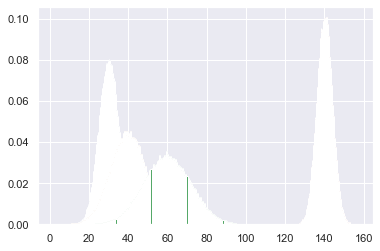

In [4]:
probas_1, values_1, _ = plt.hist(test_1, bins=200, density=True)
probas_2, values_2, _ = plt.hist(test_2, bins=200, density=True)
probas_3, values_3, _ = plt.hist(test_3, bins=200, density=True)
probas_4, values_4, _ = plt.hist(test_4, bins=200, density=True)

probas_1 = probas_1 / probas_1.sum()
probas_2 = probas_2 / probas_2.sum()
probas_3 = probas_3 / probas_3.sum()
probas_4 = probas_4 / probas_4.sum()

In [5]:
a_1 = stats.rv_histogram([probas_1, values_1])
a_2 = stats.rv_histogram([probas_2, values_2])
a_3 = stats.rv_histogram([probas_3, values_3])
a_4 = stats.rv_histogram([probas_4, values_4])

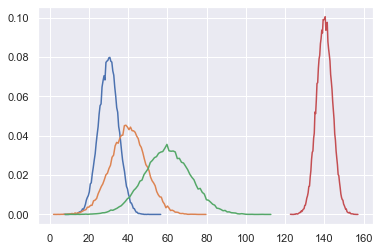

In [6]:
fig, ax = plt.subplots()

ax.plot(np.linspace(*a_1.support(), 100), a_1.pdf(np.linspace(*a_1.support(), 100)))
ax.plot(np.linspace(*a_2.support(), 100), a_2.pdf(np.linspace(*a_2.support(), 100)))
ax.plot(np.linspace(*a_3.support(), 100), a_3.pdf(np.linspace(*a_3.support(), 100)))
ax.plot(np.linspace(*a_4.support(), 100), a_4.pdf(np.linspace(*a_4.support(), 100)))

fig;

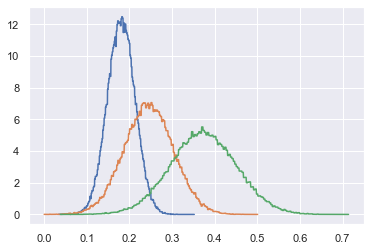

In [7]:
seller_1 = Seller(probas_1, values_1, wager=100)
seller_2 = Seller(probas_2, values_2, wager=100)
seller_3 = Seller(probas_3, values_3, wager=100)

sellers = [seller_1, seller_2, seller_3]

buyer = Buyer(probas_4, values_4, utility = 200)

market_1 = Market(sellers, buyer, task = 46)

market_1.plot_scaled_forecasts()

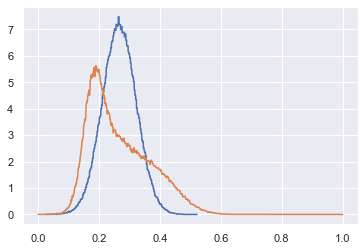

In [8]:
qa_forecast_scaled = market_1.scaled_aggregation(type = 'QA', plot = True)
lop_forecast_scaled = market_1.scaled_aggregation(type = 'LOP', plot = True)

In [9]:
lop_forecast_scaled.support()

(0.0, 1.0)

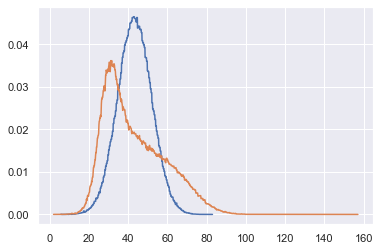

In [10]:
qa_forecast = market_1.aggregation(type = 'QA', plot = True)
lop_forecast = market_1.aggregation(type = 'LOP', plot = True)

In [11]:
market_1.make_scaling()


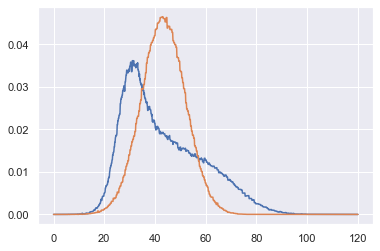

In [12]:
plt.plot(np.linspace(0,120,1000), lop_forecast.pdf(np.linspace(0,120,1000)))
plt.plot(np.linspace(0,120,1000), qa_forecast.pdf(np.linspace(0,120,1000)))

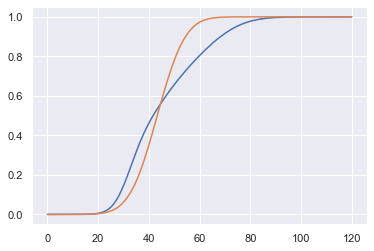

In [13]:
plt.plot(np.linspace(0,120,1000), lop_forecast.cdf(np.linspace(0,120,1000)))
plt.plot(np.linspace(0,120,1000), qa_forecast.cdf(np.linspace(0,120,1000)))

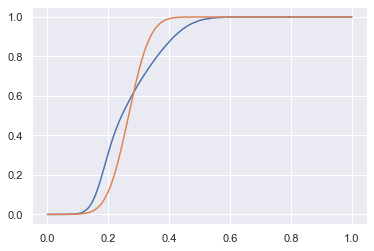

In [14]:
plt.plot(np.linspace(0,1,1000), lop_forecast_scaled.cdf(np.linspace(0,1,1000)))
plt.plot(np.linspace(0,1,1000), qa_forecast_scaled.cdf(np.linspace(0,1,1000)))

In [18]:
qa_forecast_scaled.cdf(0.2730469093021401)

0.5472767643734053

In [22]:
lop_forecast_scaled.cdf([0.2, 0.6])

array([0.00000000e+00, 5.33084217e-07])

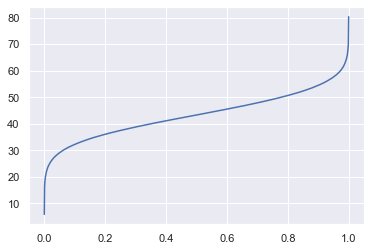

In [46]:
#plt.plot(np.linspace(0,1,1000), lop_forecast.ppf(np.linspace(0,1,1000)))
plt.plot(np.linspace(0,1,1000), qa_forecast.ppf(np.linspace(0,1,1000)))

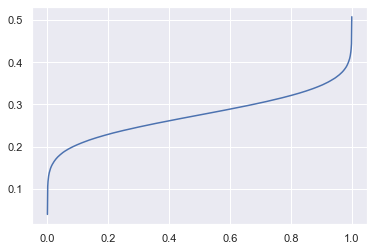

In [47]:
#plt.plot(np.linspace(0,1,1000), lop_forecast_scaled.ppf(np.linspace(0,1,1000)))
plt.plot(np.linspace(0,1,1000), qa_forecast_scaled.ppf(np.linspace(0,1,1000)))

In [48]:
market_1.scaled_task

0.2730469093021401

In [18]:
MarketOperator._scoring(qa_forecast_scaled, task = market_1.scaled_task)

0.9839911870769199

In [19]:
MarketOperator._scoring(lop_forecast_scaled, task = market_1.scaled_task)

0.9750127832585618

In [20]:
(1 - MarketOperator._scoring(qa_forecast_scaled, task = market_1.scaled_task)) / (1 - MarketOperator._scoring(lop_forecast_scaled, task = market_1.scaled_task))

0.640680116106387

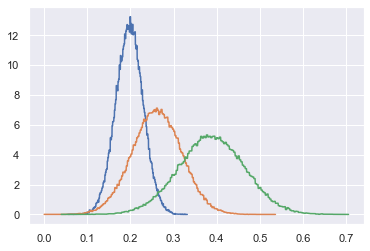

In [21]:
market_1.plot_scaled_forecasts()

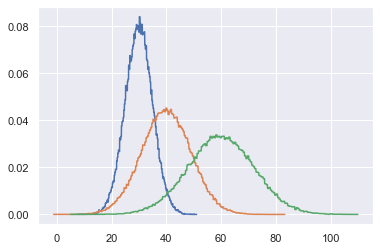

In [22]:
market_1.plot_forecasts()

In [23]:
MarketOperator._scoring(qa_forecast, task = 40) / MarketOperator._scoring(lop_forecast, task = 40)

0.5109001946570207

In [24]:
(1 - MarketOperator._scoring(qa_forecast, task = 40)) / (1 - MarketOperator._scoring(lop_forecast, task = 40))

0.6334541769888123

In [25]:
1 - MarketOperator._scoring(qa_forecast, task = 40)

2.5280477122329668

In [26]:
MarketOperator._scoring(seller_1.forecast_rv, task = 40)

-6.307893903398578

In [27]:
MarketOperator._scoring(seller_2.forecast_rv, task = 40)

-1.0998260371156512

In [28]:
MarketOperator._scoring(seller_3.forecast_rv, task = 40)

-12.737859227329974

In [29]:
MarketOperator._scoring(seller_2.forecast_rv, task = 40) / MarketOperator._scoring(seller_3.forecast_rv, task=40)

0.08634308304773042

In [30]:
market_1.scaled_dict['Seller #0']

In [31]:
MarketOperator._scoring(market_1.scaled_dict['Seller #1'], market_1.scaled_task) / MarketOperator._scoring(market_1.scaled_dict['Seller #2'], market_1.scaled_task)

1.0809593364225902

In [32]:
market_1.calculate_payoffs()

[100.25861996 103.56555129  96.17582875]
[66.84796136 69.16614699 63.98589166]


array([167.10658132, 172.73169827, 160.16172041])

In [33]:
market_1.score_dict

{'Seller #0': 0.9535975646440866,
 'Seller #1': 0.9866668778674237,
 'Seller #2': 0.9127696524947689}

In [34]:
market_1.buyers_score

0.9034787493627863